###Implemented by Federico Zocco
###Last update: 13 September 2023

This notebook performs inference by using the model trained and saved in "gluMet_training.ipynb". Refer to "gluMet_training.ipynb" for more information.

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/MyDrive/segmentation')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cityscapes', with_info=True, data_dir='GluMetF-3cls400imgs-inf') # specify 'data_dir' otherwise it searches into Colab memory instead of my drive

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2975 [00:00<?, ? examples/s]

Shuffling GluMetF-3cls400imgs-inf/cityscapes/semantic_segmentation/1.0.0.incomplete5JUCVE/cityscapes-train.tfr…

Generating validation examples...:   0%|          | 0/500 [00:00<?, ? examples/s]

Shuffling GluMetF-3cls400imgs-inf/cityscapes/semantic_segmentation/1.0.0.incomplete5JUCVE/cityscapes-validatio…

Generating test examples...:   0%|          | 0/1525 [00:00<?, ? examples/s]

Shuffling GluMetF-3cls400imgs-inf/cityscapes/semantic_segmentation/1.0.0.incomplete5JUCVE/cityscapes-test.tfre…

Dataset cityscapes downloaded and prepared to GluMetF-3cls400imgs-inf/cityscapes/semantic_segmentation/1.0.0. Subsequent calls will reuse this data.


In [ ]:
def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image_left'], (128, 128))
  input_mask = tf.image.resize(
    datapoint['segmentation_label'],
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image = tf.cast(input_image, tf.float32) / 255.0

  return input_image, input_mask

In [ ]:
BATCH_SIZE = 1  #set to 1 for inference
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_batches = test_images.batch(BATCH_SIZE)

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], create_mask(pred_mask)])

In [ ]:
model = tf.keras.models.load_model('saved_model')

1/1 [==============================] - 9s 9s/step


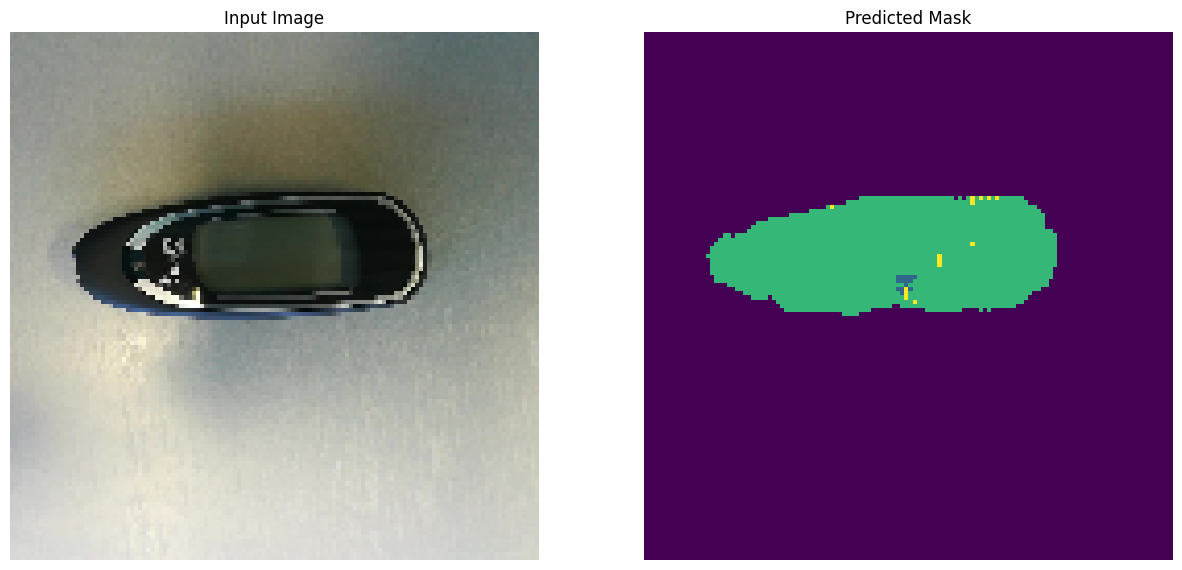

1/1 [==============================] - 0s 28ms/step


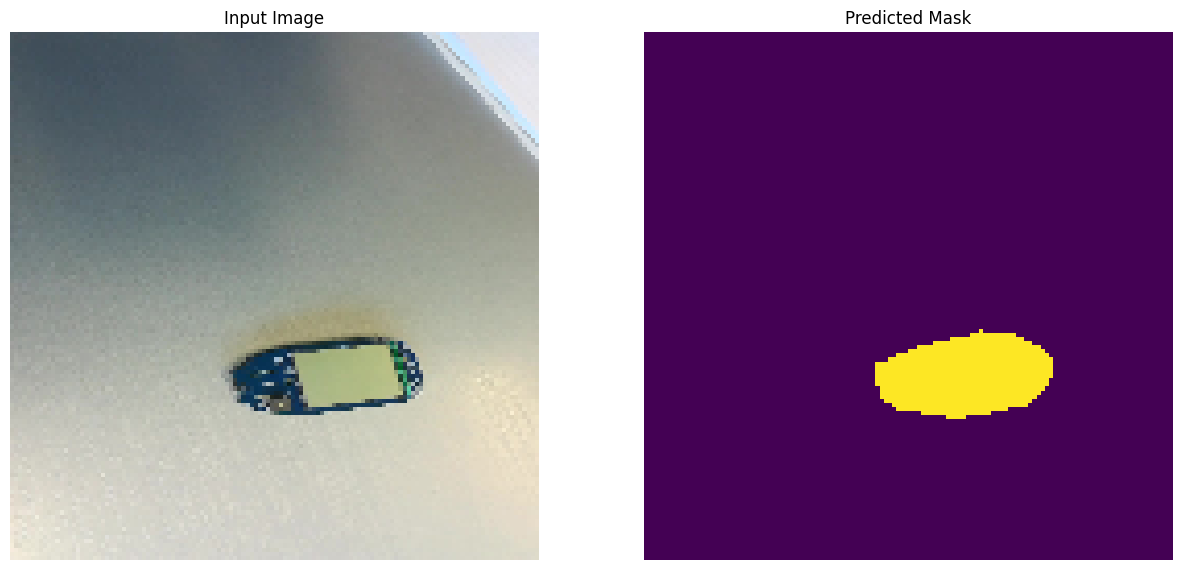

1/1 [==============================] - 0s 24ms/step


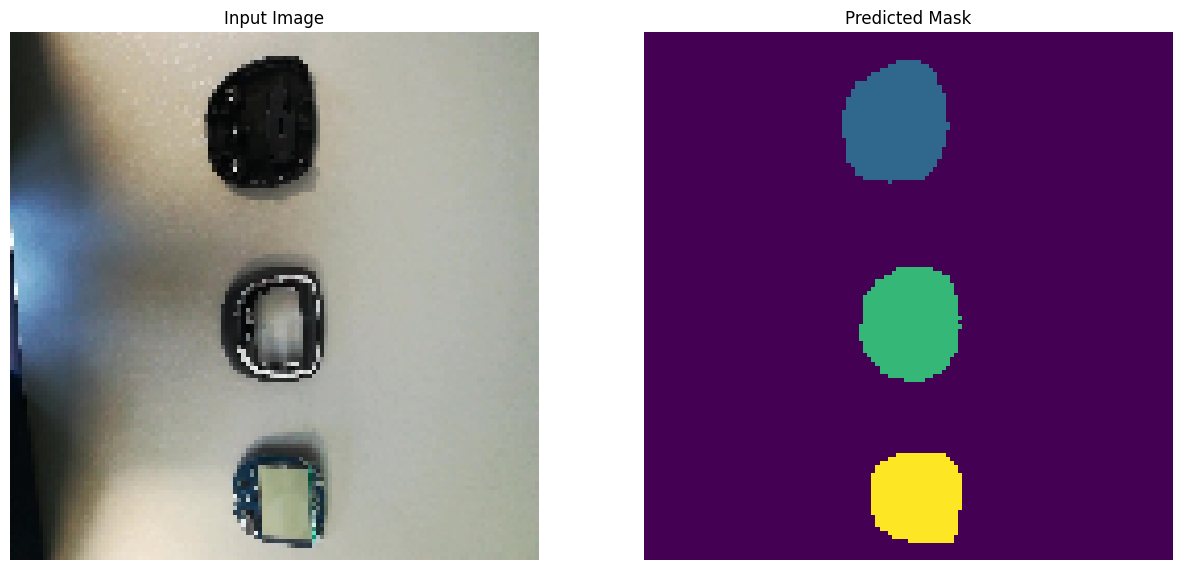

1/1 [==============================] - 0s 24ms/step


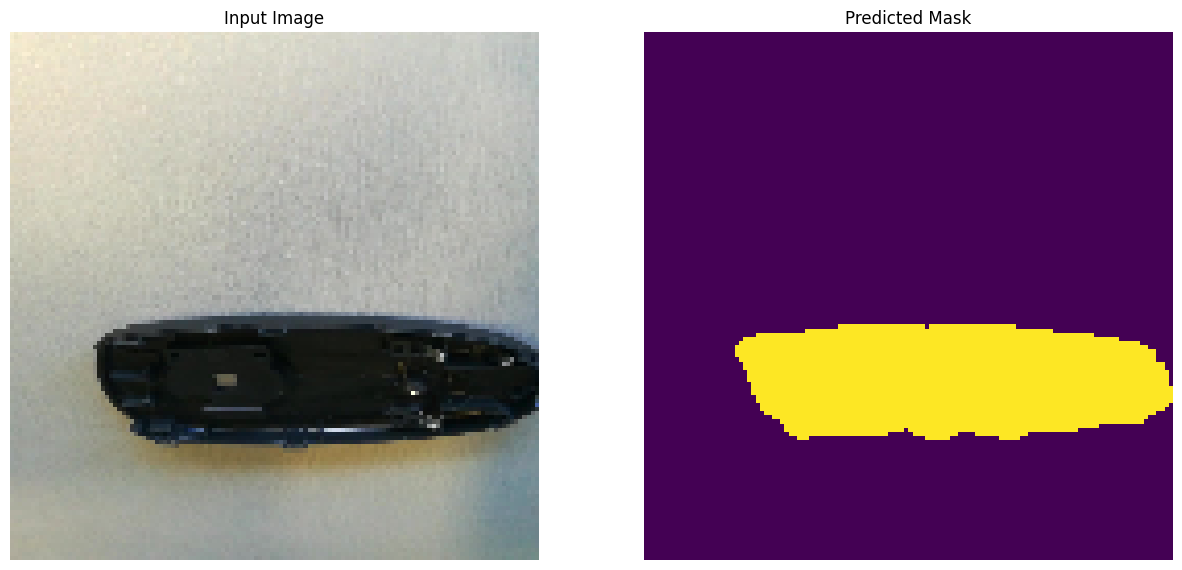

In [ ]:
show_predictions(test_batches, 4)